### Constraint-based model

In [1]:
from gurobipy import Model, GRB

# Create a new model
m = Model()

# Create variables
x1 = m.addVar(vtype=GRB.INTEGER, name="x1")
x2 = m.addVar(vtype=GRB.INTEGER, name="x2")

# Set objective function
m.setObjective(3*x1 + 2*x2 , GRB.MAXIMIZE)

#Add constraints
m.addConstr(2.2*x1 + x2  <= 100, "c1")
m.addConstr(x2  <= 30, "c2")
m.addConstr(x1  >= 0, "c3")
m.addConstr(x2  >= 0, "c4")

# Optimize model
m.optimize()

#Print values for decision variables
for v in m.getVars():
    print(v.varName, v.x)

#Print maximized profit value
print('Maximized profit:',  m.objVal)

Restricted license - for non-production use only - expires 2023-10-25
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 2 columns and 5 nonzeros
Model fingerprint: 0x8dc38072
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+02]
Found heuristic solution: objective 137.0000000
Presolve removed 3 rows and 0 columns
Presolve time: 0.00s
Presolved: 1 rows, 2 columns, 2 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)

Root relaxation: objective 1.554545e+02, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  155.45455    0    1  137.00000  155.45455

### Kinetic model

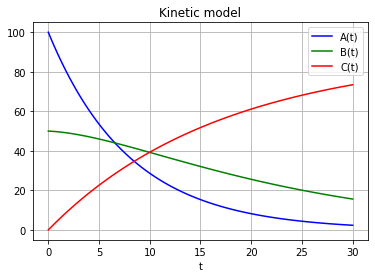

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def reaction(y, t, k1, k2, k3):
    A, B, C = y
    dydt = [
        k1*(A) + k3*(A),
        -k1*(A) + k2*(B),
        -k1*(A) + -k2*(B)]
    return dydt

k1 = -0.025
k2 = -0.055
k3 = -0.1

y0 = [100, 50, 0.0]

t = np.linspace(0, 30, 101)
sol = odeint(reaction, y0, t, args=(k1, k2, k3))

plt.plot(t, sol[:, 0], 'b', label='A(t)')
plt.plot(t, sol[:, 1], 'g', label='B(t)')
plt.plot(t, sol[:, 2], 'r', label='C(t)')
plt.title("Kinetic model")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

### Differential abundance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [409]:
def create_example_df(colnames='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """
    Creates samples for multible elements,
    each of which is normally distributed
    """
    data_cols = []
    for _ in range(0, len(colnames)):
        data_cols.append(
            abs(
                np.random.normal(
                    loc=np.random.randint(1, 5),
                    scale=0.5,
                    size=6)
                    )
                )

    df = pd.concat([pd.Series(x) for x in data_cols], axis=1)
    df.columns = [letter for letter in colnames]

    return df

df1 = create_example_df()
df2 = create_example_df()


In [7]:
df1 = pd.read_csv("df1.csv", index_col=0)
df2 = pd.read_csv("df2.csv", index_col=0)

In [11]:
f_oneway(df1['A'], df2['A'])

F_onewayResult(statistic=2.1267913961654292, pvalue=0.1754244567040866)

In [12]:
met, fcs, ps, mean1, mean2 = [], [], [], [], []
for col in df1.columns:
    met.append(col)
    fcs.append(df1[col].mean() / df2[col].mean())
    ps.append(f_oneway(df1[col], df2[col]).pvalue * len(df1.columns))
    mean1.append(df1[col].mean())
    mean2.append(df2[col].mean())

analyzed_data = pd.DataFrame({
    'metabolite': met,
    'fold_change': fcs,
    'pvalue': ps,
    'mean1': mean1,
    'mean2': mean2
})

x = np.log2(analyzed_data['fold_change'])
y = -np.log10(analyzed_data['pvalue'])

col = []
alpha = []
for i in range(len(x)):
    if (x[i] < -1 and y[i] > 2):
        col.append('navy')
        alpha.append(1)
    elif (x[i] > 1 and y[i] > 2):
        col.append('hotpink')
        alpha.append(1)
    else:
        col.append('lavender')
        alpha.append(0.5)

In [19]:
abs(x)

0     0.096356
1     0.702328
2     0.344615
3     0.201577
4     0.628230
5     0.341564
6     1.950660
7     1.607319
8     0.639415
9     0.343414
10    0.551280
11    0.143692
12    1.845009
13    1.330724
14    0.430111
15    0.920893
16    0.276454
17    0.924913
18    1.003314
19    0.499260
20    1.105366
21    1.576899
22    0.031893
23    1.173001
24    1.587460
25    0.724661
Name: fold_change, dtype: float64

In [14]:
ranks(abs(x))

[25,
 13,
 19,
 23,
 15,
 21,
 1,
 3,
 14,
 20,
 16,
 24,
 2,
 6,
 18,
 11,
 22,
 10,
 9,
 17,
 8,
 5,
 26,
 7,
 4,
 12]

In [13]:
# Bokeh Libraries
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.io import output_file, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool

# output_file('filename.html')
output_notebook()

ranks = lambda l:[1+sum(y<x for x in l)for y in l]

# Store the data in a ColumnDataSource
volcano = ColumnDataSource(pd.DataFrame({
    'Metabolite' : analyzed_data['metabolite'],
    'fold_change' : x,
    'pvalue' : y,
    'color' : col,
    'alpha' : alpha,
    'mean1' : analyzed_data['mean1'],
    'mean2' : analyzed_data['mean2'],
    'mean2-' : -analyzed_data['mean2'],
    'indices' : ranks(abs(x)),
}))

# Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Create the figure
fig = figure(plot_height=400,
             plot_width=400,
             x_axis_label='fold_change[log2]',
             y_axis_label='pvalue[-log10]',
             title='Volcano Plot',
             toolbar_location='below',
             tools=select_tools)

# Add square representing each metabolite
fig.square(x='fold_change',
           y='pvalue',
           source=volcano,
           color='color',
           alpha='alpha',
           size=5,
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.5)
fig.line([min(x), max(x)], [2, 2], line_width=2, line_dash='dashed')
fig.line([1, 1], [min(y), max(y)], line_width=2, line_dash='dashed')
fig.line([-1, -1], [min(y), max(y)], line_width=2, line_dash='dashed')

# Format the tooltip
tooltips = [
            ('Metabolite','@Metabolite'),
            ('log2(fold_change)', '@fold_change'),
            ('-log10(pvalue)', '@pvalue'),
           ]

# Configure a renderer to be used upon hover
hover_glyph = fig.circle(x='fold_change', y='pvalue', source=volcano,
                         size=15, alpha=0, color='color', selection_color='color',
                         hover_fill_color='black', hover_alpha=0.5)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips, renderers=[hover_glyph]))

# Create a figure relating the totals
fig_bar = figure(title='Concentrations',
                plot_height=400, plot_width=400, tools=select_tools,
                x_axis_label='Metabolites', y_axis_label='Measured concentration')

# Draw with square markers
fig_bar.vbar(x='indices', top='mean1', source=volcano, width=0.75, fill_color='darkseagreen')
fig_bar.vbar(x='indices', top='mean2-', source=volcano, width=0.75, fill_color='sandybrown')

# Configure a renderer to be used upon hover
hover_glyph_bar = fig_bar.vbar(x='indices', bottom='mean2-', top='mean1', source=volcano,
                         width=1, alpha=0, color='darkseagreen', selection_color='darkseagreen',
                         hover_fill_color='black', hover_alpha=0.5)

tooltips_bar = [
            ('Metabolite','@Metabolite'),
            ('Mean df1', '@mean1'),
            ('Mean df2', '@mean2'),
           ]

# Add the HoverTool to the figure
fig_bar.add_tools(HoverTool(tooltips=tooltips_bar, renderers=[hover_glyph_bar]))

grid = gridplot([[fig, fig_bar]])

# Visualize
show(grid)

Loading BokehJS ...

In [545]:
import pandas as pd
import numpy as np
from functools import partial
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
from bokeh.plotting import figure, output_file
from bokeh.models.sources import ColumnDataSource
from bokeh.models import HoverTool, SaveTool
from bokeh.plotting import output_notebook, show

df_t = pd.concat([df1, df2]).transpose()

df_std = (df_t - df_t.min(axis=0)) / (df_t.max(axis=0) - df_t.min(axis=0))
df_scaled = (df_std * (2.0 - 0.0) - 1.0).abs()

X = pairwise_distances(df_t.values, metric='euclidean')
Z = linkage(X, 'ward')
results = dendrogram(Z, no_plot=True)
icoord, dcoord = results['icoord'], results['dcoord']
labels = list(map(int, results['ivl']))
df = df_t.iloc[labels]
df_scaled = df_scaled.iloc[labels]

##########
X_2 = pairwise_distances(pd.concat([df1, df2]).values, metric='euclidean')
Z_2 = linkage(X_2, 'ward')
results_2 = dendrogram(Z_2, no_plot=True) 
icoord_2, dcoord_2 = results_2['icoord'], results_2['dcoord']
##########

total_mean = df_t.mean().mean()

mets = []
xs = []
ys = []
colors = []
alpha = []
value = []

for i, met in enumerate(df.index):
    mets.extend([met]*len(df.columns))
    xs.extend(list(np.arange(0.5, len(df.columns)+0.5)))
    ys.extend([i+0.5]*len(df.columns))
    values = df.loc[met].tolist()
    value.extend(values)
    greater_than_mean = list(np.array(values) >= total_mean)
    colors.extend(['red' if greater else 'blue' for greater in greater_than_mean])
    alpha.extend(df_scaled.loc[met].tolist())

data = pd.DataFrame(dict(
        mets=mets,
        xs=xs,
        ys=ys,
        colors=colors,
        value=value,
        alpha=alpha
        ))

source = ColumnDataSource(data)

hover = HoverTool()

hover.tooltips = [
    ("Metabolite", "@mets"),
    ("Value", "@value")
]

height, width = df.shape

icoord = pd.DataFrame(icoord)
icoord = icoord * (data['ys'].max() / icoord.max().max())
icoord = icoord.values

dcoord = pd.DataFrame(dcoord)
dcoord = dcoord * (data['xs'].max() / dcoord.max().max()) * 0.5
dcoord = dcoord.values


hm = figure(x_range=[-40, 40],
            height=600,
            width=600,
            tools=[ 
                    SaveTool()],
            output_backend="webgl"
)

for i, d in zip(icoord, dcoord):
    d = list(map(lambda x: -x, d))
    hm.line(x=d, y=i, line_color='black')

#########################################
icoord_2 = pd.DataFrame(icoord_2)
icoord_2 = icoord_2 * (data['xs'].max() / icoord_2.max().max())
icoord_2 = icoord_2.values

dcoord_2 = pd.DataFrame(dcoord_2)
dcoord_2 = dcoord_2 * (data['ys'].max() / dcoord_2.max().max()) * 0.1 + data['ys'].max() + data['ys'].min()
dcoord_2 = dcoord_2.values


for i, d in zip(icoord_2, dcoord_2):
    i = list(map(lambda y: y, i))
    hm.line(x=i, y=d, line_color='black')
#########################################

hm.add_tools(hover)


rects = hm.rect(x='xs', y='ys',
        height=1,
        width=1,
        fill_color='colors',
        line_color='black',
        source=source,
        line_alpha=0.2,
        fill_alpha='alpha'
        )

hm.text([data['xs'].max()+0.66] * len(data['mets'].unique()), 
        data['ys'].unique().tolist(), 
        text=[nm for nm in df.index],
        #text=[nm for nm in df.index[labels]],
        text_baseline='middle',
        text_font_size='6pt'
       
       )

hm.axis.major_tick_line_color = None
hm.axis.minor_tick_line_color = None
hm.axis.major_label_text_color = None
hm.axis.major_label_text_font_size = '0pt'
hm.axis.axis_line_color = None
hm.grid.grid_line_color = None
hm.outline_line_color = None

output_notebook()

show(hm)

/var/folders/4t/z957yjm52ks8l2j2grrchnfm0000gn/T/ipykernel_52467/1711442444.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(X, 'ward')
/var/folders/4t/z957yjm52ks8l2j2grrchnfm0000gn/T/ipykernel_52467/1711442444.py:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_2 = linkage(X_2, 'ward')


Loading BokehJS ...

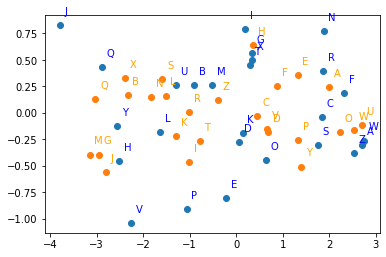

In [195]:
from sklearn.cross_decomposition import PLSRegression

# 2 Latent Variables, scaling
plsr = PLSRegression(n_components=4, scale=True)

X=df1.transpose()
Y=df2.transpose()
# PLS-DA algorithm
plsr.fit(X, Y)

X_train = plsr.transform(X)
Y_train= plsr.transform(Y)

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(Y_train[:,0], Y_train[:,1])
for i in range(X_train.shape[0]):
    plt.text(x=X_train[:,0][i]+0.1, y=X_train[:,1][i]+0.1, s=X.index[i],
    fontdict=dict(color='blue', size=10))
for i in range(Y_train.shape[0]):
    plt.text(x=Y_train[:,0][i]+0.1, y=Y_train[:,1][i]+0.1, s=Y.index[i],
    fontdict=dict(color='orange', size=10))

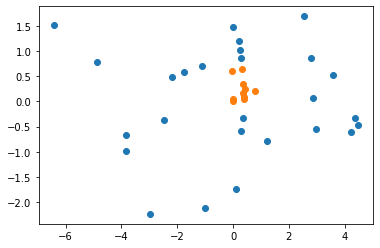

In [141]:
plt.scatter(plsr.x_scores_[:,0], plsr.x_scores_[:,1])
plt.scatter(plsr.x_loadings_[:,0], plsr.x_loadings_[:,1])